In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
merged_weather_flight = pd.read_csv('../../data/processed/flights_weather.csv')
merged_weather_flight

,Year,Month,Day,DayOfWeek,FlightNumber,AirlineCode,TailNumber,OriginAirport,DestinationAirport,DepartureTime,...,DestinationAirportName,FlightDate,Delayed,Date,Awnd,Prcp,Snow,Tmax,Tmin,AirportCode
0,2015,10,1,4,2582,DL,N993AT,10397,10135,2103.0,...,NaN,2015-10-01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,10,1,4,4940,EV,N851AS,10397,10135,1024.0,...,NaN,2015-10-01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,10,1,4,5969,EV,N11551,13930,10135,1353.0,...,NaN,2015-10-01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,10,1,4,5151,EV,N858AS,11433,10135,1359.0,...,NaN,2015-10-01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,10,1,4,5197,EV,N849AS,10397,10135,1444.0,...,NaN,2015-10-01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,2015,12,31,4,2991,OO,N464SW,PHX,YUM,942.0,...,Yuma International Airport,2015-12-31,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5714004,2015,12,31,4,2961,OO,N869AS,PHX,YUM,1100.0,...,Yuma International Airport,2015-12-31,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5714005,2015,12,31,4,2956,OO,N821AS,PHX,YUM,1436.0,...,Yuma International Airport,2015-12-31,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5714006,2015,12,31,4,2963,OO,N821AS,PHX,YUM,1736.0,...,Yuma International Airport,2015-12-31,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
merged_weather_flight['Delayed'].unique()

array([False,  True])

In [7]:
merged_weather_flight = merged_weather_flight[['DayOfWeek', 'AirlineCode', 'OriginAirport', 'DestinationAirport', 'DepartureTime',
       'ArrivalTime', 'AirTime', 'Distance', 'Delayed',
       'Diverted', 'WeatherDelay', 'FlightDate', 'Date', 'Awnd', 'Prcp', 'Snow', 'Tmax', 'Tmin']]
merged_weather_flight

,DayOfWeek,AirlineCode,OriginAirport,DestinationAirport,DepartureTime,ArrivalTime,AirTime,Distance,Delayed,Diverted,WeatherDelay,FlightDate,Date,Awnd,Prcp,Snow,Tmax,Tmin
0,4,DL,10397,10135,2103.0,2257.0,88.0,692,False,0,0.0,2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1,4,EV,10397,10135,1024.0,1216.0,92.0,692,False,0,0.0,2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2,4,EV,13930,10135,1353.0,1658.0,91.0,655,False,0,0.0,2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN
3,4,EV,11433,10135,1359.0,1521.0,62.0,425,False,0,0.0,2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN
4,4,EV,10397,10135,1444.0,1645.0,102.0,692,False,0,0.0,2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,4,OO,PHX,YUM,942.0,1041.0,34.0,160,False,0,0.0,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
5714004,4,OO,PHX,YUM,1100.0,1203.0,37.0,160,False,0,0.0,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
5714005,4,OO,PHX,YUM,1436.0,1536.0,38.0,160,False,0,0.0,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
5714006,4,OO,PHX,YUM,1736.0,1828.0,33.0,160,False,0,0.0,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merged_weather_flight.columns

Index(['DayOfWeek', 'AirlineCode', 'OriginAirport', 'DestinationAirport',
       'DepartureTime', 'ArrivalTime', 'AirTime', 'Distance', 'Delayed',
       'Diverted', 'WeatherDelay', 'FlightDate', 'Date', 'Awnd', 'Prcp',
       'Snow', 'Tmax', 'Tmin'],
      dtype='object')

In [9]:
merged_weather_flight.dropna(subset=['Date', 'Awnd', 'Prcp', 'Snow', 'Tmax', 'Tmin'], inplace=True)

In [10]:
merged_weather_flight = merged_weather_flight.sample(n=10000, random_state=42)

<AxesSubplot:xlabel='Delayed', ylabel='count'>

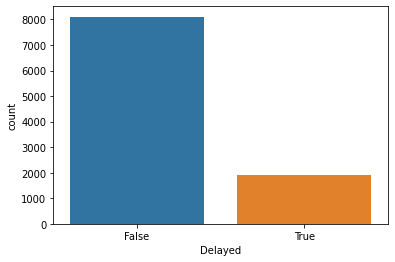

In [21]:
sns.countplot(x='Delayed', data=merged_weather_flight)

In [11]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(merged_weather_flight.drop(columns=['Delayed']), merged_weather_flight['Delayed'])

<AxesSubplot:xlabel='Delayed', ylabel='count'>

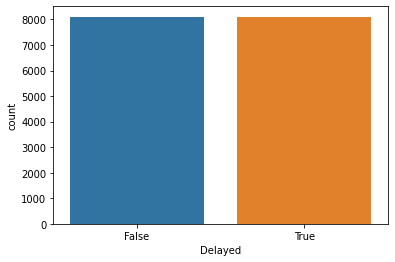

In [23]:
sns.countplot(x=y_resampled)

In [12]:
X_resampled = pd.get_dummies(X_resampled)

In [13]:
print(y_resampled)

0        False
1        False
2         True
3        False
4         True
         ...  
16209     True
16210     True
16211     True
16212     True
16213     True
Name: Delayed, Length: 16214, dtype: bool


In [14]:
print(X_resampled)

       DayOfWeek  DepartureTime  ArrivalTime  AirTime  Distance  Diverted  \
0              4          538.0        646.0    104.0       680         0   
1              1          715.0        842.0     70.0       458         0   
2              7         1825.0       2011.0    180.0      1222         0   
3              5          744.0        906.0     70.0       471         0   
4              5         1651.0       1706.0     60.0       307         0   
...          ...            ...          ...      ...       ...       ...   
16209          3         1916.0       2222.0    106.0       817         0   
16210          2          957.0       1437.0    141.0      1175         0   
16211          4         1357.0       1702.0    339.0      2556         0   
16212          1         1326.0       2118.0    269.0      2398         0   
16213          7         2017.0       2220.0    103.0       632         0   

       WeatherDelay   Awnd  Prcp  Snow  ...  Date_2015-12-22  Date_2015-12-

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [43]:
results = []

pipeline = Pipeline([
    ('random_forest', RandomForestClassifier())
])

random_forest_tuning = GridSearchCV(
    pipeline, 
    param_grid={'random_forest__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}, 
    cv=6, 
    scoring='f1',
    n_jobs=-1,
)

random_forest_tuning.fit(X_resampled, y_resampled)

cross_val_score(random_forest_tuning.best_estimator_, X_resampled, y_resampled, cv=6).mean()

0.9656477998375027

In [41]:
results = []

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

logreg_tuning = RandomizedSearchCV(
    pipeline, 
    param_distributions={'logreg__C': np.linspace(0.001, 1, 100), 'logreg__penalty': ['l1', 'l2']},
    cv=6, 
    scoring='f1',
    n_jobs=-1,
    n_iter=10
)

logreg_tuning.fit(X_resampled, y_resampled)

cross_val_score(logreg_tuning.best_estimator_, X_resampled, y_resampled, cv=6).mean()

/Users/heritsam/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/heritsam/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

0.7127181110003881

In [42]:
models = {"Logistic Regression": logreg_tuning,
          "Random Forest": random_forest_tuning}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='f1')
    results.append(cv_scores)

results_df = pd.DataFrame(results, index=models.keys())
results_df.columns = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6']
results_df


/Users/heritsam/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/heritsam/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

KeyboardInterrupt: 